In [1]:
import tensorflow as tf
import torch
import pandas as pd
import seaborn as sns  # to plot images and statical version of data
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import PIL
import pickle
from tensorflow.keras import layers

# Introduction

In this Assignment I have implemented 3 models for image classification

- LeNet
- ResNet
- GoogleNet

The data set used in CIFAR-10 which containts total of 60,000 images. 50,000 for training and 10,000 for testing.
In the following sections you will find the models, their implementations and results


# Utility functions for LeNet

In [2]:
def set_all_seeds(seed):
    os.environ["PL_GLOBAL_SEED"] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

In [3]:
def set_deterministic():
    if torch.cuda.is_available():
        torch.backends.cudnn.benchmark = False
        torch.backends.cudnn.deterministic = True
    torch.set_deterministic(True)

In [4]:
##########################
### SETTINGS
##########################

# Hyperparameters
RANDOM_SEED = 0
LEARNING_RATE = 0.0001
BATCH_SIZE = 256
NUM_EPOCHS = 100

# Architecture
NUM_CLASSES = 10

# Other
DEVICE = "cuda:0"

set_all_seeds(RANDOM_SEED)

# Deterministic behavior not yet supported by AdaptiveAvgPool2d
#set_deterministic()

# LeNet5

![LeNet-5](http://media5.datahacker.rs/2018/11/LeNet5-1024x188.png)

## Model overview
A classic CNN Model first proposed in 1998

This model consists of 7 layers.

-   3 convolutional layers
-   2 subsampling layers
-   2 fully connected layers

## Downloading the dataset

In [5]:
(X_train, y_train) , (X_test, y_test) = tf.keras.datasets.cifar10.load_data()



170508288/170498071 [==============================] - 3s 0us/step


In [6]:
print(X_train.shape)

(50000, 32, 32, 3)


In [7]:
X_test.shape

(10000, 32, 32, 3)

## Data visualization

array([5], dtype=uint8)

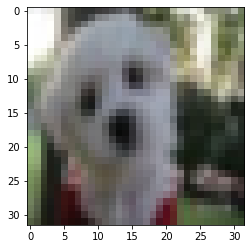

In [8]:
i = random.randint(1, 50000)
plt.imshow(X_train[i]) # showing the image
y_train[i] # showing the label of that images

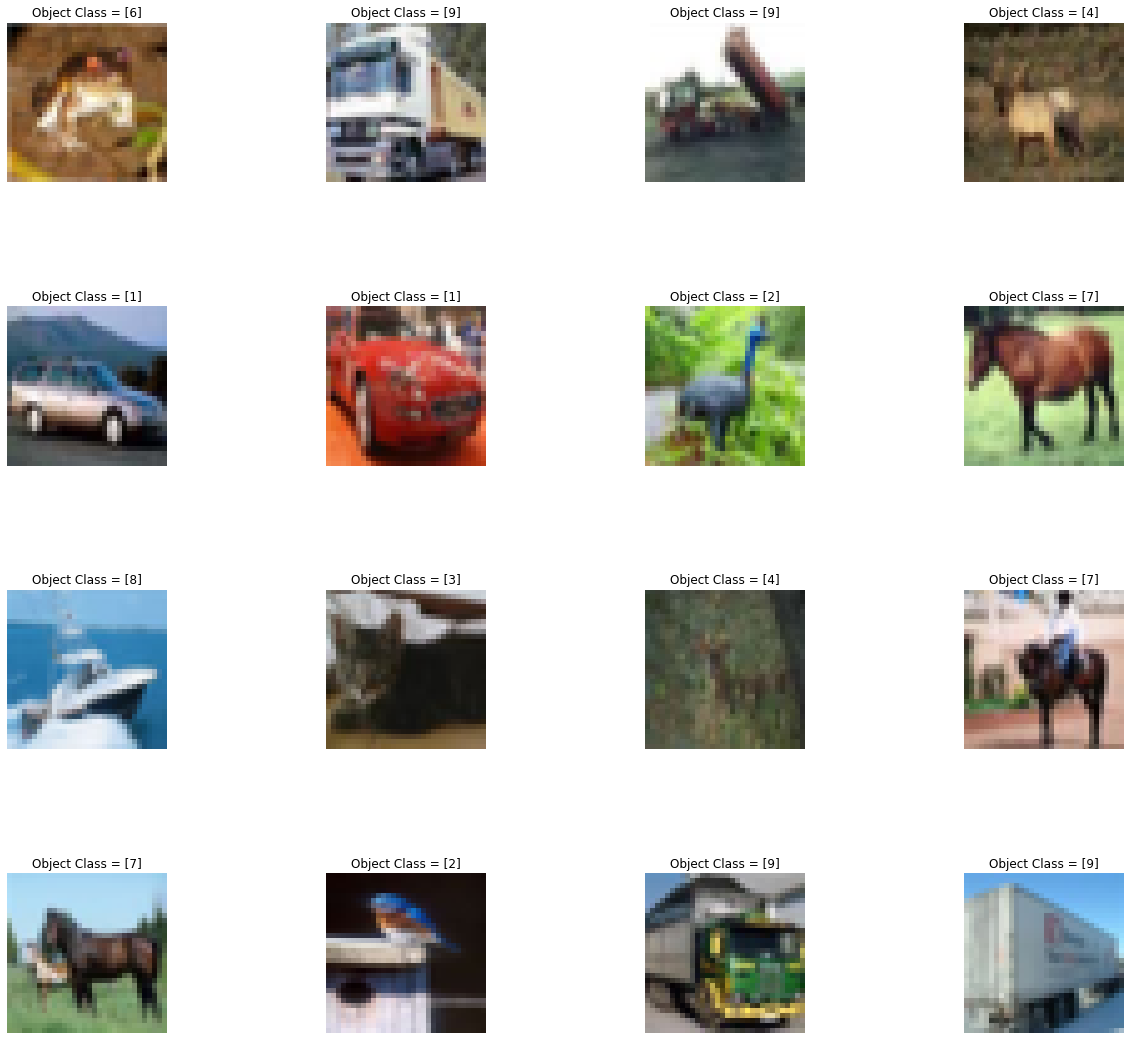

In [9]:
L = 4
W = 4
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_train[i])
    axes[i].set_title("Object Class = {}".format(y_train[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

## Data Preparation

In [10]:
# Coverting the images to gray image (32X32X1) from colored format (32X32X3)
X_train_gray = np.sum(X_train/3, axis=3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims = True)

In [11]:
X_train_gray_norm = (X_train_gray - 128) / 128
X_test_gray_norm = (X_test_gray - 128) / 128

## LeNet Model

Following is thedefinition of the LeNet Model. It inherits the keras Sequential model. We have then added the layers of the LeNet Model which use the ReLu activation function. We have use Adam Optimizer and Sparse Categorical Cross-entropy loss function.

In [12]:
from tensorflow.keras import datasets, layers, models
LeNet = models.Sequential()

LeNet.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape= (32,32,1)))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Conv2D(16, (5,5), activation = 'relu'))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Flatten())

LeNet.add(layers.Dense(120, activation='relu'))

LeNet.add(layers.Dense(84, activation='relu'))

LeNet.add(layers.Dense(43, activation='softmax'))
LeNet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

2022-05-21 06:46:44.292801: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-21 06:46:44.293849: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-21 06:46:44.294520: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-21 06:46:44.295344: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [13]:
LeNet.compile(optimizer = 'Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
history = LeNet.fit(X_train_gray_norm, y_train, epochs=100, batch_size=500, verbose=1)

2022-05-21 06:46:50.567635: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-05-21 06:46:51.864441: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


100/100 [==============================] - 7s 4ms/step - loss: 2.3109 - accuracy: 0.2128
Epoch 2/100
100/100 [==============================] - 0s 4ms/step - loss: 1.8681 - accuracy: 0.3327
Epoch 3/100
100/100 [==============================] - 0s 4ms/step - loss: 1.7157 - accuracy: 0.3882
Epoch 4/100
100/100 [==============================] - 0s 4ms/step - loss: 1.6508 - accuracy: 0.4144
Epoch 5/100
100/100 [==============================] - 0s 4ms/step - loss: 1.5953 - accuracy: 0.4329
Epoch 6/100
100/100 [==============================] - 0s 4ms/step - loss: 1.5467 - accuracy: 0.4529
Epoch 7/100
100/100 [==============================] - 0s 4ms/step - loss: 1.5115 - accuracy: 0.4643
Epoch 8/100
100/100 [==============================] - 1s 6ms/step - loss: 1.4776 - accuracy: 0.4772
Epoch 9/100
100/100 [==============================] - 0s 5ms/step - loss: 1.4411 - accuracy: 0.4932
Epoch 10/100
100/100 [==============================] - 0s 4ms/step - loss: 1.4096 - accuracy: 0.5025
E

## LeNet Model Evaluation

In [15]:
score = LeNet.evaluate(X_test_gray_norm, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.2241 - accuracy: 0.6271


In [16]:
print('LeNEt Model accuracy on Test Dataset: {}'.format(score[1]))

LeNEt Model accuracy on Test Dataset: 0.6270999908447266


In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [18]:
accuracy = history.history['accuracy']
loss = history.history['loss']

# print("Accuracy: ",accuracy)
# print("Loss: ", loss)

In [19]:
epochs = range(len(accuracy)) # we coudl have given the values directly as we alread know the the number of epochs while training the model
epochs

range(0, 100)

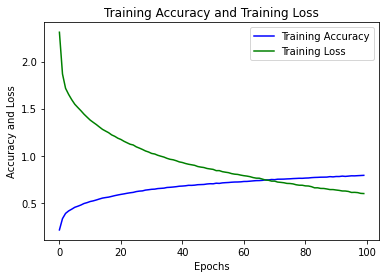

In [20]:
plt.plot(epochs, accuracy, 'b', label = 'Training Accuracy')
plt.plot(epochs, loss, 'g', label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy and Loss')
plt.title('Training Accuracy and Training Loss')
plt.legend()
plt.show()

In [21]:
predicted_classes = LeNet.predict(X_test_gray_norm)
y_true = y_test

In [22]:
temp_pred = []
for i in predicted_classes:
    temp_pred.append(np.where( i == max(i))[0][0])

# temp_pred

In [23]:
temp_y = []
for i in y_true:
    temp_y.append(i[0])
# temp_y

<AxesSubplot:>

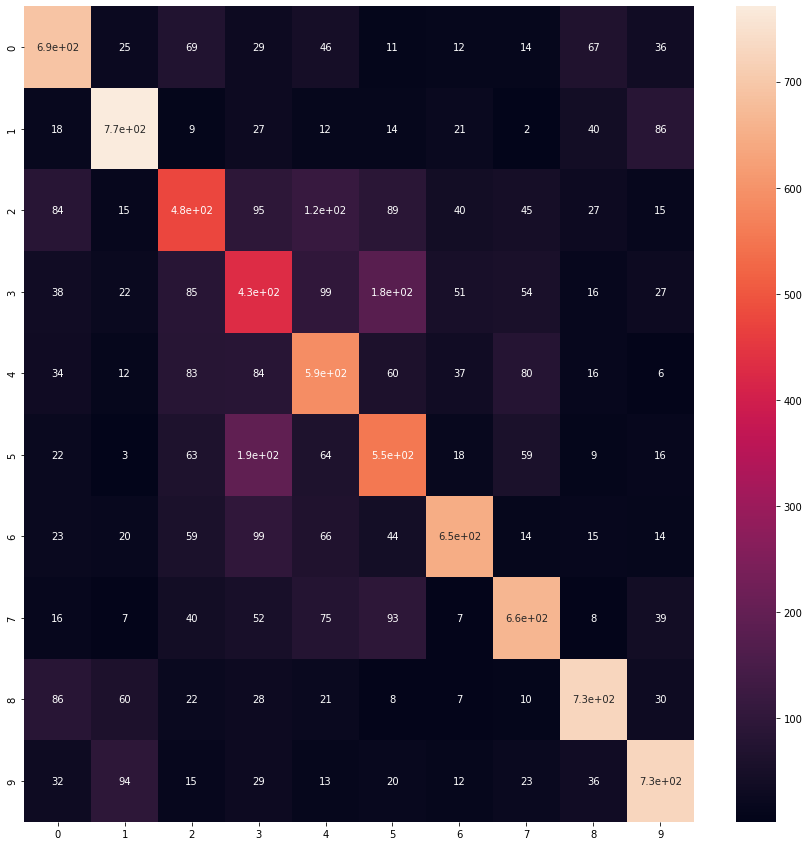

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(temp_y, temp_pred)

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot = True)

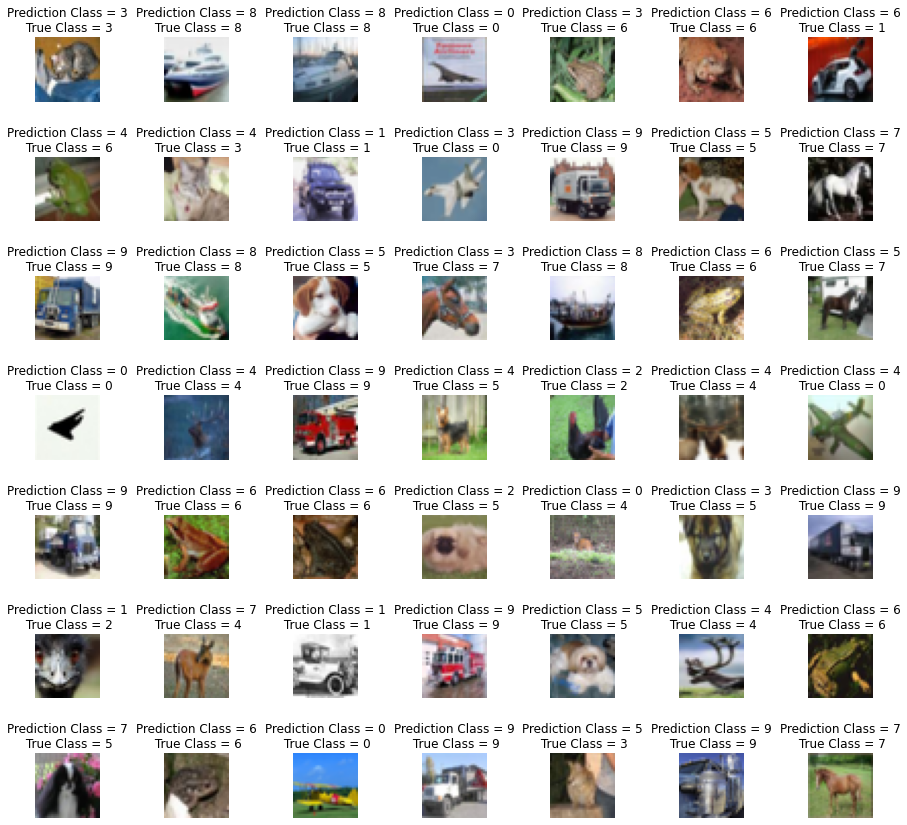

In [25]:
# Image Augementation to generate the new dataset by rotating 90, left, counterclockwise, blurr, shorten, sharpen
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (15,15))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction Class = {}\n True Class = {}".format(temp_pred[i], temp_y[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

In [26]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(temp_y, temp_pred, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.66      0.69      0.68      1000
     Class 1       0.75      0.77      0.76      1000
     Class 2       0.52      0.47      0.49      1000
     Class 3       0.40      0.43      0.42      1000
     Class 4       0.54      0.59      0.56      1000
     Class 5       0.52      0.55      0.53      1000
     Class 6       0.76      0.65      0.70      1000
     Class 7       0.69      0.66      0.68      1000
     Class 8       0.76      0.73      0.74      1000
     Class 9       0.73      0.73      0.73      1000

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.63     10000
weighted avg       0.63      0.63      0.63     10000



# ResNet

![image.png](https://www.researchgate.net/profile/Zhongnan-Qu/publication/351046093/figure/fig3/AS:1015228695343106@1619060791401/ResNet-20-architecture.png)
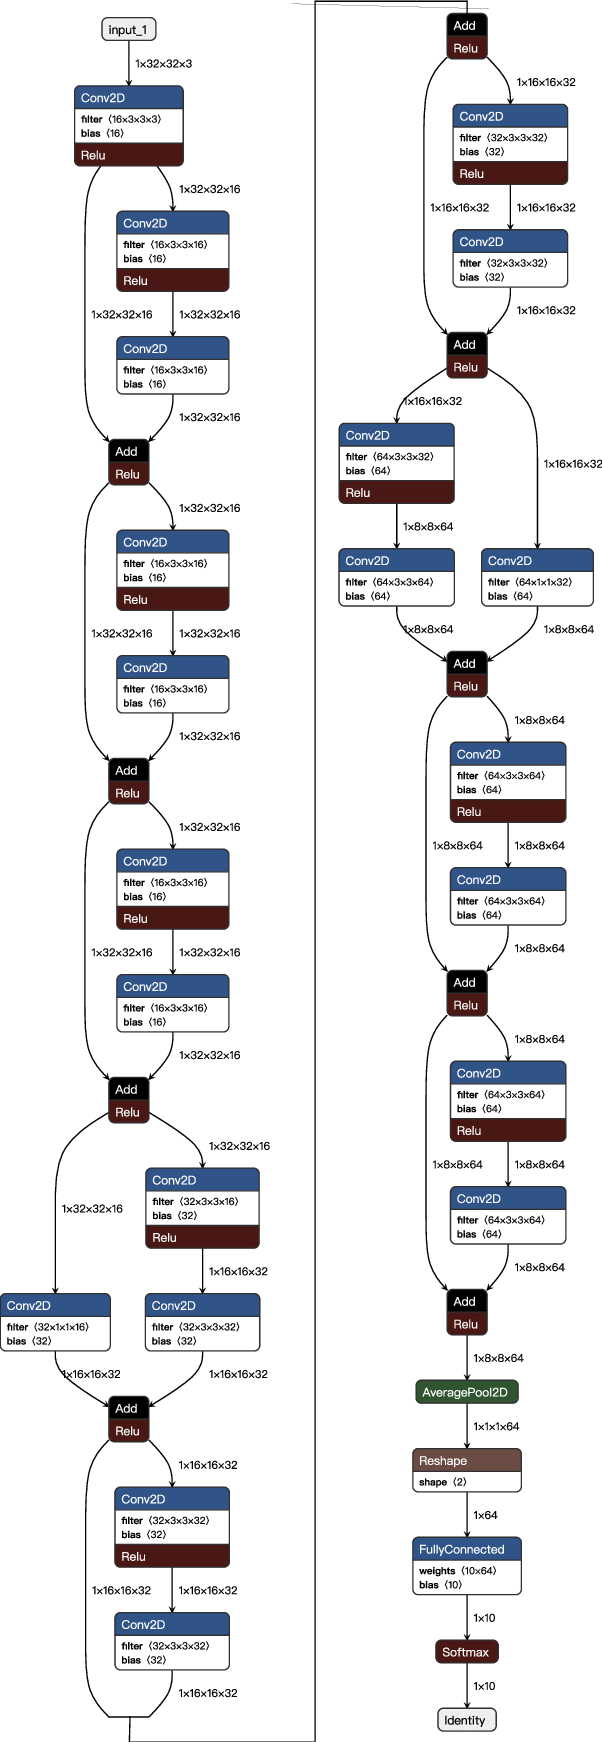
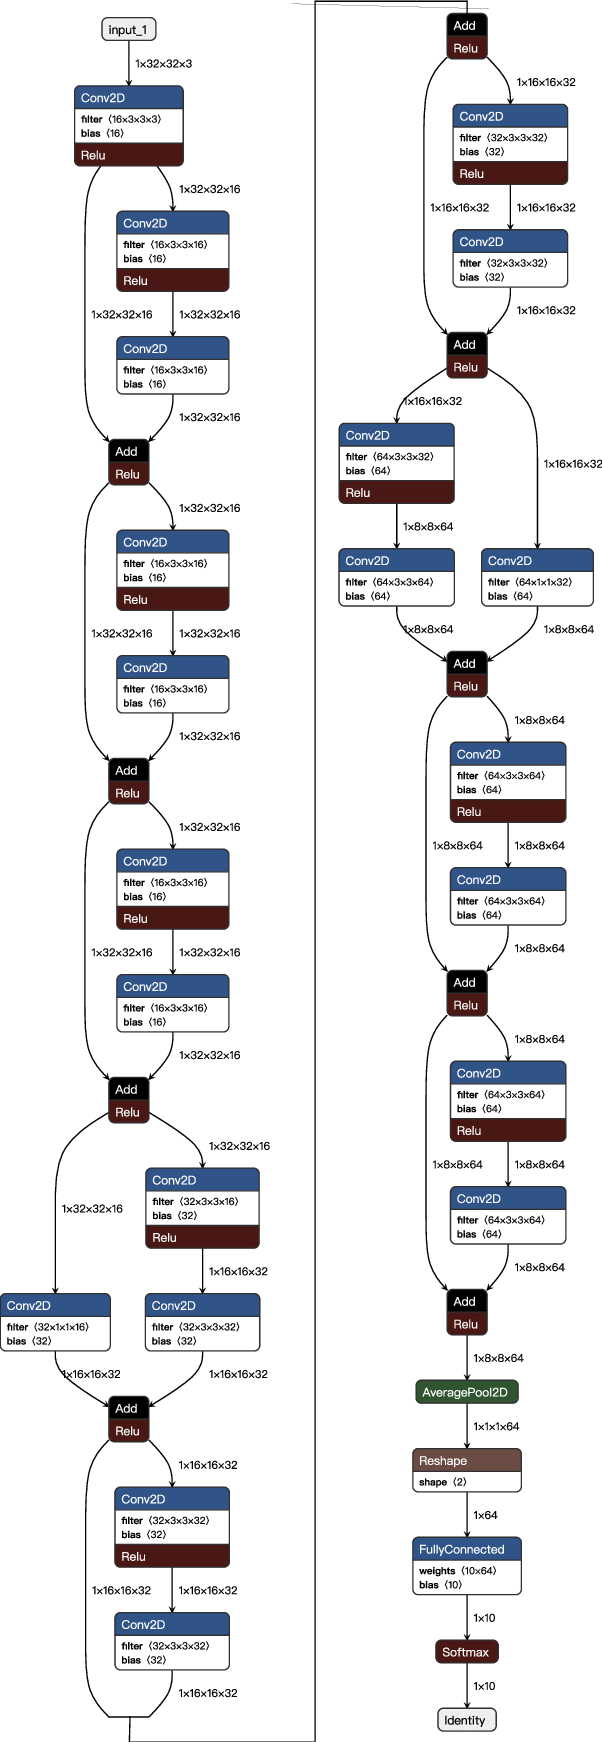

## Issue
Deep networks are hard to train because of the notorious vanishing gradient problem — as the gradient is back-propagated to earlier layers, repeated multiplication may make the gradient infinitively small. As a result, as the network goes deeper, its performance gets saturated or even starts degrading rapidly.

## How ResNet solves it
The core idea of ResNet is introducing a so-called “identity shortcut connection” that skips one or more layers, as shown in the following figure:
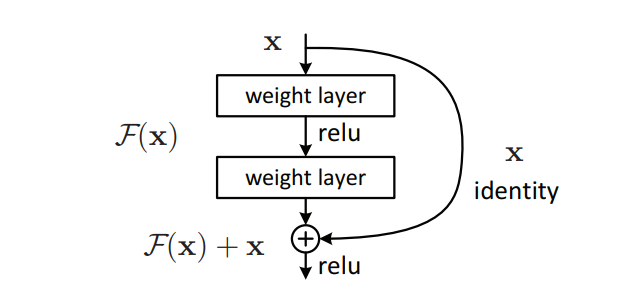
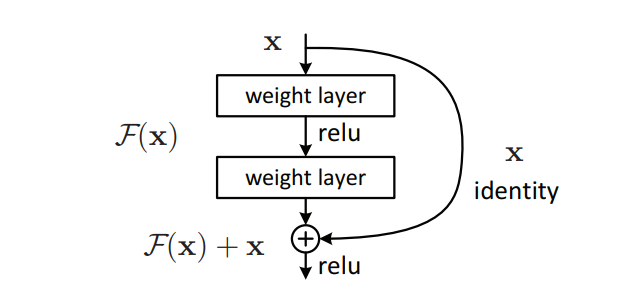

![ResNet](https://iq.opengenus.org/content/images/2020/01/resnet.png)

## Importing relevant libraries 

In [27]:
from __future__ import print_function
import tensorflow as tf
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
# from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.datasets import cifar10
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Setting parameters

In [28]:
# Training parameters
batch_size = 128  # orig paper trained all networks with batch_size=128
epochs = 100
data_augmentation = True
num_classes = 10

# Subtracting pixel mean improves accuracy
subtract_pixel_mean = True


n = 3

In [29]:
# Model version
# Orig paper: version = 1 (ResNet v1), Improved ResNet: version = 2 (ResNet v2)
version = 1

# Computed depth from supplied model parameter n
if version == 1:
    depth = n * 6 + 2
elif version == 2:
    depth = n * 9 + 2

# Model name, depth and version
model_type = 'ResNet%dv%d' % (depth, version)

## Loading and Normalizing Dataset for ResNet

In [30]:
# Load the CIFAR10 data.
(x_train, y_train), (x_test, y_test) =  tf.keras.datasets.cifar10.load_data()

# Input image dimensions.
input_shape = x_train.shape[1:]

# Normalize data.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# If subtract pixel mean is enabled
if subtract_pixel_mean:
    x_train_mean = np.mean(x_train, axis=0)
    x_train -= x_train_mean
    x_test -= x_train_mean

In [31]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
y_train shape: (50000, 1)


In [32]:
# Convert class vectors to binary class matrices.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [33]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

## Function for deciding Learning rate 

In [34]:
def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr


## Function for generating ResNet Layers

In [35]:
def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
    """2D Convolution-Batch Normalization-Activation stack builder

    # Arguments
        inputs (tensor): input tensor from input image or previous layer
        num_filters (int): Conv2D number of filters
        kernel_size (int): Conv2D square kernel dimensions
        strides (int): Conv2D square stride dimensions
        activation (string): activation name
        batch_normalization (bool): whether to include batch normalization
        conv_first (bool): conv-bn-activation (True) or
            bn-activation-conv (False)

    # Returns
        x (tensor): tensor as input to the next layer
    """
    conv = Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
    else:
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
        x = conv(x)
    return x

## Function to Generate the model

In [36]:
def resnet_v1(input_shape, depth, num_classes=10):
    """ResNet Version 1 Model builder [a]

    Stacks of 2 x (3 x 3) Conv2D-BN-ReLU
    Last ReLU is after the shortcut connection.
    At the beginning of each stage, the feature map size is halved (downsampled)
    by a convolutional layer with strides=2, while the number of filters is
    doubled. Within each stage, the layers have the same number filters and the
    same number of filters.
    Features maps sizes:
    stage 0: 32x32, 16
    stage 1: 16x16, 32
    stage 2:  8x8,  64
    The Number of parameters is approx the same as Table 6 of [a]:
    ResNet20 0.27M
    ResNet32 0.46M
    ResNet44 0.66M
    ResNet56 0.85M
    ResNet110 1.7M

    # Arguments
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)

    # Returns
        model (Model): Keras model instance
    """
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg 20, 32, 44 in [a])')
    # Start model definition.
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)

    inputs = Input(shape=input_shape)
    x = resnet_layer(inputs=inputs)
    # Instantiate the stack of residual units
    for stack in range(3):
        for res_block in range(num_res_blocks):
            strides = 1
            if stack > 0 and res_block == 0:  # first layer but not first stack
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            if stack > 0 and res_block == 0:  # first layer but not first stack
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = keras.layers.add([x, y])
            x = Activation('relu')(x)
        num_filters *= 2

    # Add classifier on top.
    # v1 does not use BN after last shortcut connection-ReLU
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model

## ResNet Model Generation and setting its parameters

In [37]:
model = resnet_v1(input_shape=input_shape, depth=depth)

model.compile(loss='categorical_crossentropy',
              optimizer= tf.keras.optimizers.Adam(learning_rate=lr_schedule(0)),
              metrics=['accuracy'])
model.summary()
print(model_type)

# Prepare model model saving directory.
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'cifar10_%s_model.{epoch:03d}.h5' % model_type
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

# Prepare callbacks for model saving and for learning rate adjustment.
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True)

lr_scheduler = LearningRateScheduler(lr_schedule)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)

callbacks = [checkpoint, lr_reducer, lr_scheduler]


Learning rate:  0.001
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 16)   448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 16)   64          conv2d_2[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 16)   0           batch_normalization[0][0]        
________________________________________________________________________

## Resnet training

In [38]:
history= model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True,
          callbacks=callbacks)

2022-05-21 06:48:53.742861: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 614400000 exceeds 10% of free system memory.
2022-05-21 06:48:54.370011: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/100
Learning rate:  0.001
391/391 [==============================] - 12s 26ms/step - loss: 1.6439 - accuracy: 0.4634 - val_loss: 1.5202 - val_accuracy: 0.4969
Epoch 2/100
Learning rate:  0.001
391/391 [==============================] - 9s 24ms/step - loss: 1.1559 - accuracy: 0.6423 - val_loss: 1.4085 - val_accuracy: 0.5830
Epoch 3/100
Learning rate:  0.001
391/391 [==============================] - 10s 25ms/step - loss: 0.9659 - accuracy: 0.7106 - val_loss: 1.4253 - val_accuracy: 0.5795
Epoch 4/100
Learning rate:  0.001
391/391 [==============================] - 9s 24ms/step - loss: 0.8419 - accuracy: 0.7577 - val_loss: 1.1760 - val_accuracy: 0.6561
Epoch 5/100
Learning rate:  0.001
391/391 [==============================] - 9s 24ms/step - loss: 0.7523 - accuracy: 0.7884 - val_loss: 1.3785 - val_accuracy: 0.6253
Epoch 6/100
Learning rate:  0.001
391/391 [==============================] - 10s 25ms/step - loss: 0.6808 - accuracy: 0.8141 - val_loss: 1.2971 - val_accuracy: 0.6378
E

## ResNet Evaluation

In [39]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 2s 5ms/step - loss: 1.3616 - accuracy: 0.8033
Test loss: 1.361568570137024
Test accuracy: 0.8033000230789185


In [40]:
accuracy = history.history['accuracy']
loss = history.history['loss']

In [41]:
epochs = range(len(accuracy)) # we coudl have given the values directly as we alread know the the number of epochs while training the model
epochs

range(0, 100)

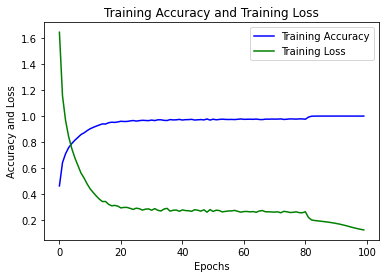

In [42]:
plt.plot(epochs, accuracy, 'b', label = 'Training Accuracy')
plt.plot(epochs, loss, 'g', label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy and Loss')
plt.title('Training Accuracy and Training Loss')
plt.legend()
plt.show()

In [43]:
predicted_classes = model.predict(x_test)
y_true = y_test

In [44]:
temp_pred = []
for i in predicted_classes:
    temp_pred.append(np.where( i == max(i))[0][0])

# temp_pred

In [45]:
temp_y = []
for i in y_true:
#     print(i)
    temp_y.append(np.where( i == max(i))[0][0])
# print(temp_y)

<AxesSubplot:>

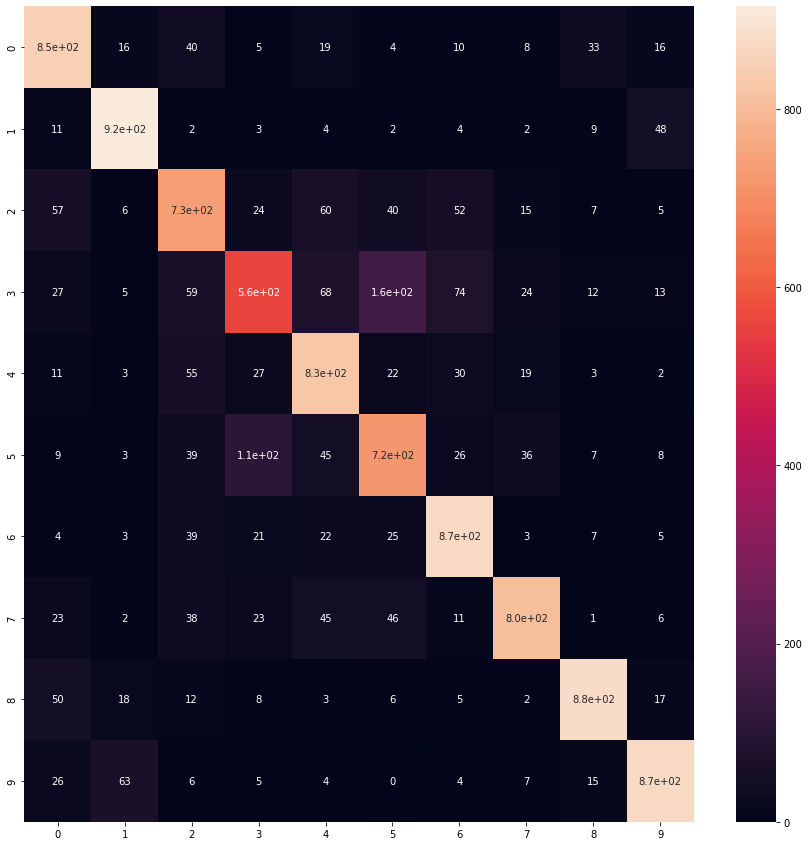

In [46]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(temp_y, temp_pred)

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot = True)

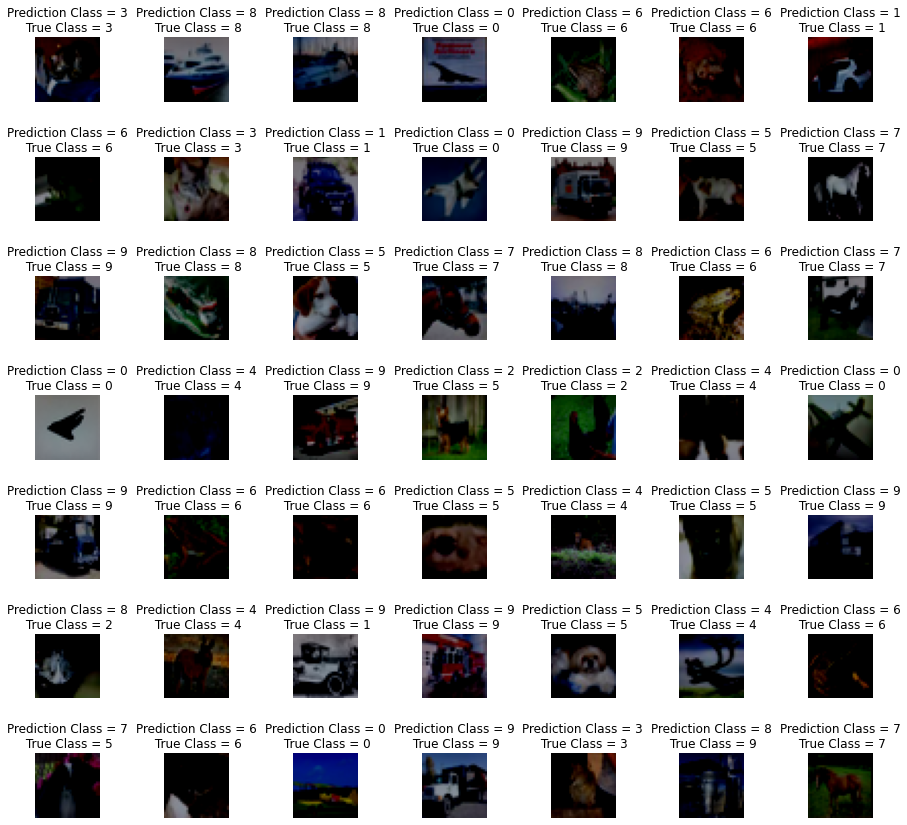

In [47]:
# Image Augementation to generate the new dataset by rotating 90, left, counterclockwise, blurr, shorten, sharpen
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (15,15))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i])
    axes[i].set_title("Prediction Class = {}\n True Class = {}".format(temp_pred[i], temp_y[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

In [48]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(temp_y, temp_pred, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.80      0.85      0.82      1000
     Class 1       0.88      0.92      0.90      1000
     Class 2       0.72      0.73      0.73      1000
     Class 3       0.72      0.56      0.63      1000
     Class 4       0.75      0.83      0.79      1000
     Class 5       0.70      0.72      0.71      1000
     Class 6       0.80      0.87      0.83      1000
     Class 7       0.87      0.81      0.84      1000
     Class 8       0.90      0.88      0.89      1000
     Class 9       0.88      0.87      0.87      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



# Google Net

![GoogLENet](https://media.geeksforgeeks.org/wp-content/uploads/20200429201549/Inceptionv1_architecture.png)

## Importing Relevant Libraries

In [49]:
import keras
from keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.layers import AveragePooling2D
from keras.layers import MaxPooling2D
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from keras.layers import concatenate
import matplotlib
matplotlib.use("Agg")
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import SGD
from keras.datasets import cifar10
import numpy as np

## Functions to generate different GoogleNet Modules

In [50]:
def conv_module(input_,No_of_filters,filtersizeX,filtersizeY,stride,chanDim,padding="same"):
    input_ = Conv2D(No_of_filters,(filtersizeX,filtersizeY),strides=stride,padding=padding)(input_)
    input_ = BatchNormalization(axis=chanDim)(input_)
    input_ = Activation("relu")(input_)
    return input_

In [51]:
def inception_module(input_,numK1x1,numK3x3,numk5x5,numPoolProj,chanDim):
                                 #Step 1
    conv_1x1 = conv_module(input_, numK1x1, 1, 1,(1, 1), chanDim) 
                                 #Step 2
    conv_3x3 = conv_module(input_, numK3x3, 3, 3,(1, 1), chanDim)
    conv_5x5 = conv_module(input_, numk5x5, 5, 5,(1, 1), chanDim)
                                 #Step 3
    pool_proj = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(input_)
    pool_proj = Conv2D(numPoolProj, (1, 1), padding='same', activation='relu')(pool_proj)
                                 #Step 4
    input_ = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=chanDim)
    return input_

In [52]:
def downsample_module(input_,No_of_filters,chanDim):
    conv_3x3=conv_module(input_,No_of_filters,3,3,(2,2),chanDim,padding="valid")
    pool = MaxPooling2D((3,3),strides=(2,2))(input_)
    input_ = concatenate([conv_3x3,pool],axis=chanDim)
    return input_

## GoogleNet Model Generation

In [53]:
def GoogleNet(width,height,depth,classes):
    inputShape=(height,width,depth)
    chanDim=-1

    # (Step 1) Define the model input
    inputs = Input(shape=inputShape)

    # First CONV module
    x = conv_module(inputs, 96, 3, 3, (1, 1),chanDim)

    # (Step 2) Two Inception modules followed by a downsample module
    x = inception_module(x, 32, 32,32,32,chanDim)
    x = inception_module(x, 32, 48, 48,32,chanDim)
    x = downsample_module(x, 80, chanDim)

    # (Step 3) Five Inception modules followed by a downsample module
    x = inception_module(x, 112, 48, 32, 48,chanDim)
    x = inception_module(x, 96, 64, 32,32,chanDim)
    x = inception_module(x, 80, 80, 32,32,chanDim)
    x = inception_module(x, 48, 96, 32,32,chanDim)
    x = inception_module(x, 112, 48, 32, 48,chanDim)
    x = downsample_module(x, 96, chanDim)

    # (Step 4) Two Inception modules followed
    x = inception_module(x, 176, 160,96,96, chanDim)
    x = inception_module(x, 176, 160, 96,96,chanDim)

    # Global POOL and dropout
    x = AveragePooling2D((7, 7))(x)
    x = Dropout(0.5)(x)

    # (Step 5) Softmax classifier
    x = Flatten()(x)
    x = Dense(classes)(x)
    x = Activation("softmax")(x)

    # Create the model
    model = Model(inputs, x, name="googlenet")
    return model

## Setting Parameters

In [54]:
NUM_EPOCHS = 50
INIT_LR = 5e-3
def poly_decay(epoch):
    maxEpochs = NUM_EPOCHS
    baseLR = INIT_LR
    power = 1.0
    alpha = baseLR * (1 - (epoch / float(maxEpochs))) ** power
    return alpha

## Loading and Normalizing Data

In [55]:
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float")
testX = testX.astype("float")

mean = np.mean(trainX, axis=0)
trainX -= mean
testX -= mean

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

aug = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1, horizontal_flip=True,fill_mode="nearest")

## Setting Model Param and Fitting

In [56]:
callbacks=[LearningRateScheduler(poly_decay)]
opt = SGD(learning_rate=INIT_LR, momentum=0.9)
model = GoogleNet(width=32, height=32, depth=3, classes=10)
                                    
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
                                    
history = model.fit(aug.flow(trainX, trainY, batch_size=64),validation_data=(testX, testY), steps_per_epoch=len(trainX) // 64,epochs=NUM_EPOCHS, callbacks=callbacks, verbose=1)

Epoch 1/50
781/781 [==============================] - 70s 84ms/step - loss: 1.3902 - accuracy: 0.4989 - val_loss: 1.3549 - val_accuracy: 0.5720
Epoch 2/50
781/781 [==============================] - 63s 81ms/step - loss: 0.9398 - accuracy: 0.6677 - val_loss: 1.0470 - val_accuracy: 0.6407
Epoch 3/50
781/781 [==============================] - 65s 83ms/step - loss: 0.7643 - accuracy: 0.7346 - val_loss: 0.8895 - val_accuracy: 0.6968
Epoch 4/50
781/781 [==============================] - 65s 83ms/step - loss: 0.6551 - accuracy: 0.7728 - val_loss: 0.6709 - val_accuracy: 0.7678
Epoch 5/50
781/781 [==============================] - 65s 83ms/step - loss: 0.5800 - accuracy: 0.8020 - val_loss: 0.7402 - val_accuracy: 0.7553
Epoch 6/50
781/781 [==============================] - 65s 83ms/step - loss: 0.5186 - accuracy: 0.8225 - val_loss: 0.6740 - val_accuracy: 0.7787
Epoch 7/50
781/781 [==============================] - 65s 83ms/step - loss: 0.4732 - accuracy: 0.8373 - val_loss: 0.6057 - val_accuracy:

## GoogleNet Evaluation

In [57]:
score=model.evaluate(testX,testY)
print('Test Loss=',score[0])
print('Test Accuracy=',score[1])

313/313 [==============================] - 5s 17ms/step - loss: 0.3741 - accuracy: 0.9057
Test Loss= 0.3741082549095154
Test Accuracy= 0.9057000279426575


In [58]:
accuracy = history.history['accuracy']
loss = history.history['loss']

In [59]:
epochs = range(len(accuracy)) # we coudl have given the values directly as we alread know the the number of epochs while training the model
epochs

range(0, 50)

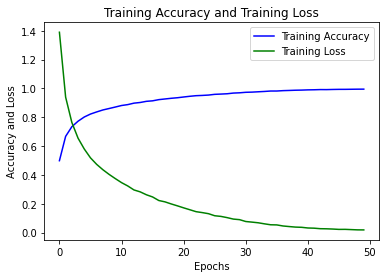

In [60]:
plt.plot(epochs, accuracy, 'b', label = 'Training Accuracy')
plt.plot(epochs, loss, 'g', label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy and Loss')
plt.title('Training Accuracy and Training Loss')
plt.legend()
plt.show()

In [61]:
predicted_classes = model.predict(testX)
y_true = testY

In [62]:
temp_pred = []
for i in predicted_classes:
    temp_pred.append(np.where( i == max(i))[0][0])

# temp_pred

In [63]:
temp_y = []
for i in y_true:
#     print(i)
    temp_y.append(np.where( i == max(i))[0][0])
# print(temp_y)

<AxesSubplot:>

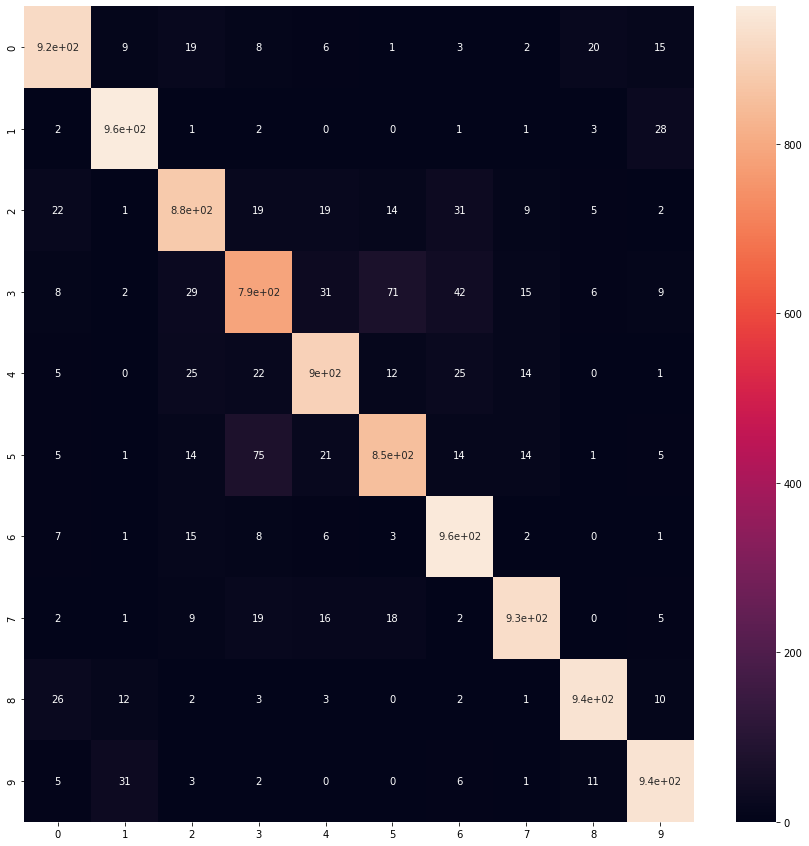

In [64]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(temp_y, temp_pred)

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot = True)

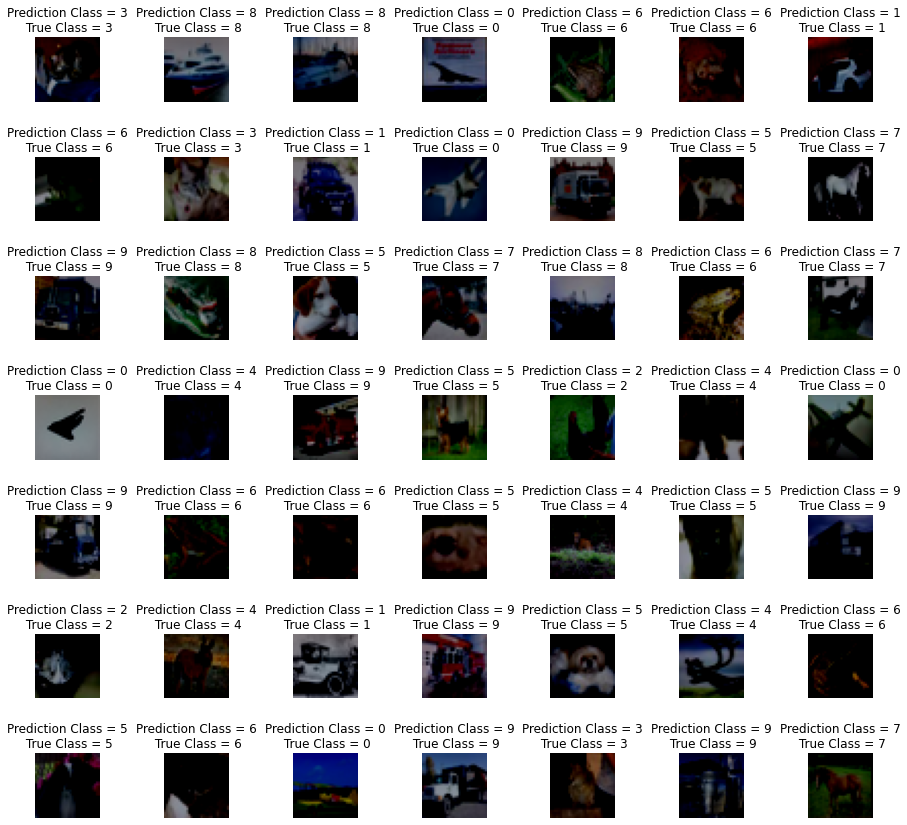

In [65]:
# Image Augementation to generate the new dataset by rotating 90, left, counterclockwise, blurr, shorten, sharpen
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (15,15))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i])
    axes[i].set_title("Prediction Class = {}\n True Class = {}".format(temp_pred[i], temp_y[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

In [66]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(temp_y, temp_pred, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.92      0.92      0.92      1000
     Class 1       0.94      0.96      0.95      1000
     Class 2       0.88      0.88      0.88      1000
     Class 3       0.83      0.79      0.81      1000
     Class 4       0.90      0.90      0.90      1000
     Class 5       0.88      0.85      0.86      1000
     Class 6       0.88      0.96      0.92      1000
     Class 7       0.94      0.93      0.93      1000
     Class 8       0.95      0.94      0.95      1000
     Class 9       0.93      0.94      0.93      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



# Conclusion

- LeNet is a simpler model and is quicker to train
- ResNet and GoogleNet required more resourses and time to train
- ResNet and GoogleNet giver better test results than LeNet
- Deeper models are more capable of learning more features
- Deeper models have the downside of Vanishing gradients
- Resnet overcomes this by adding residual layers
- GoogleNet overcomes this by adding Inception layers
